### Reading Data & Understanding structure of Data

In [ ]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [ ]:
import pandas as pd  #importing pandas 
df = pd.read_csv('DataPanelWHR2021C2.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file 

In [ ]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
df.shape 

(1949, 11)

Thus we can see that we have 1949 data samples with 9 features and 2 classes - positive effect or negative effect 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
df['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [ ]:
df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

Thus this data contains the positive and negative affect scores of 166 countries within 16 years period 

### Some EDA




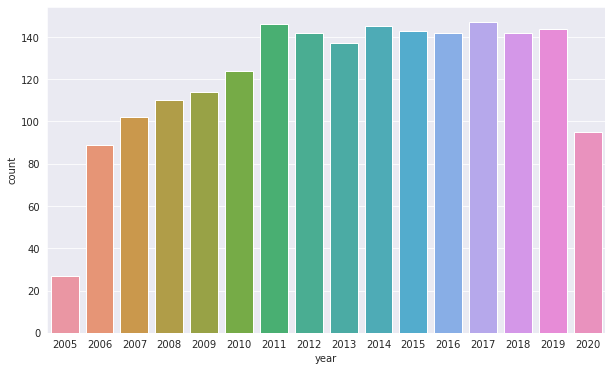

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='year')

In [ ]:
df['Country name'][166]

'Benin'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0799d8c610>,
      dtype=object)

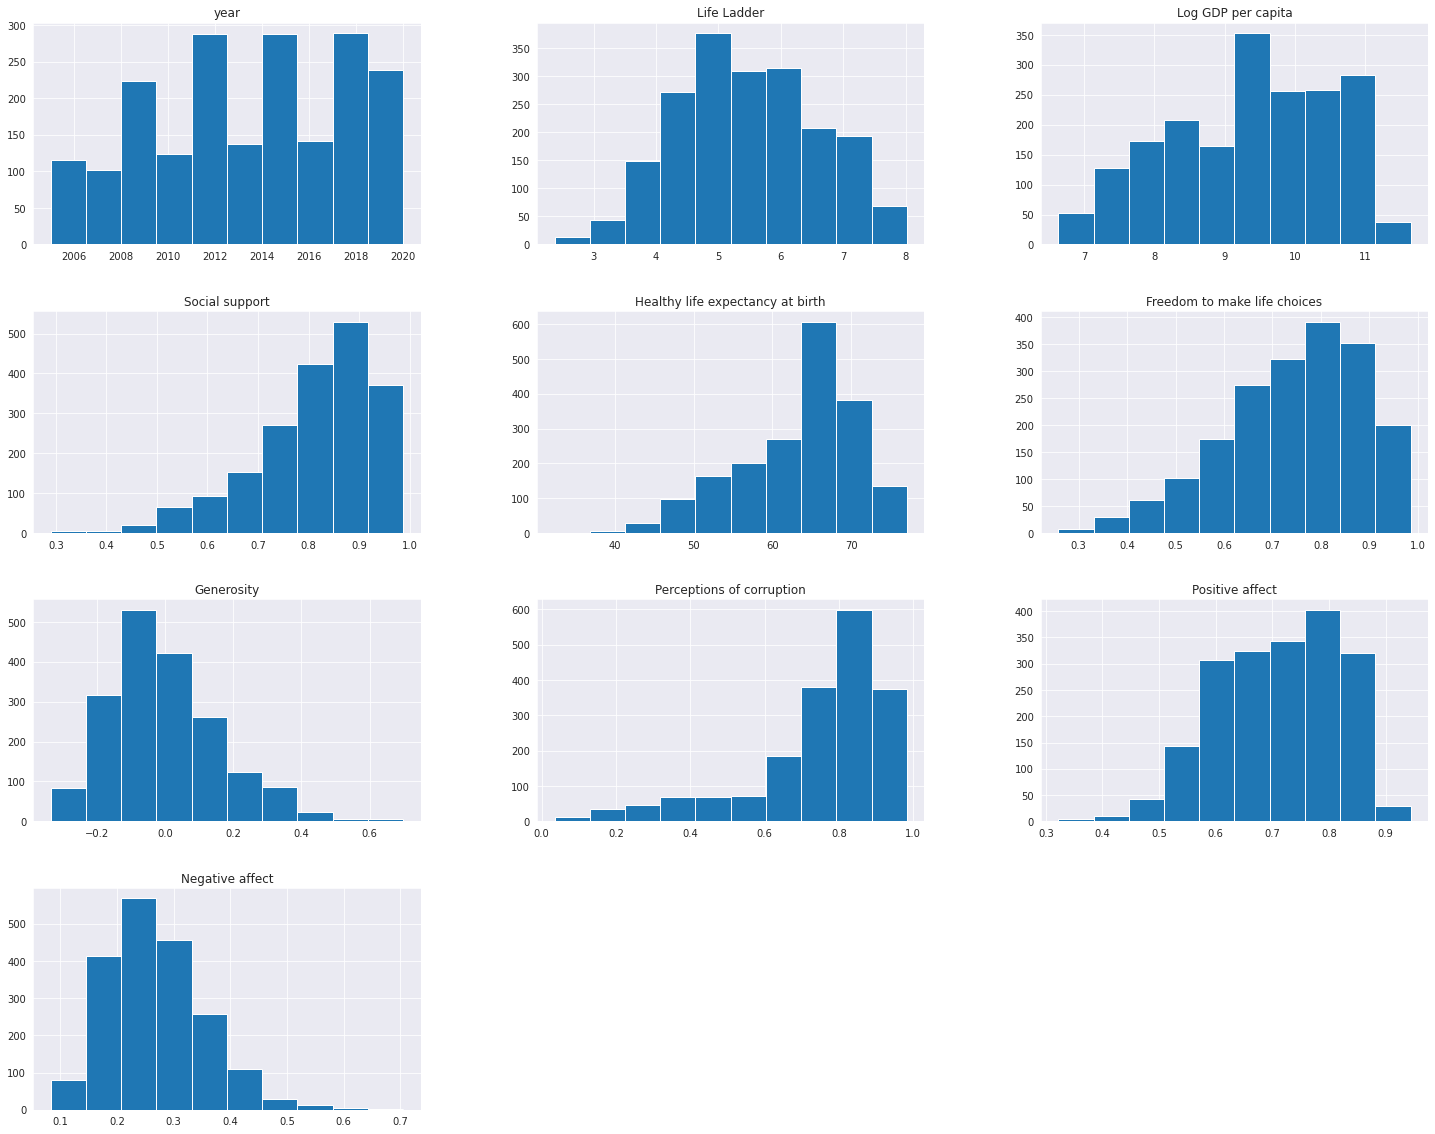

In [ ]:
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
df.hist(ax=ax)

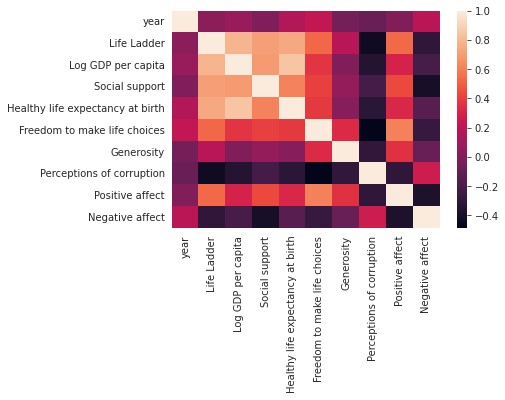

In [ ]:
correlations = df.corr()
sns.heatmap(correlations)
plt.show()

In [ ]:
# Printing the correlation values of the features with the target variable of PA
PA_corr = df.corr()['Positive affect'].sort_values(ascending=False)
PA_corr

Positive affect                     1.000000
Freedom to make life choices        0.606114
Life Ladder                         0.532273
Social support                      0.432152
Generosity                          0.358006
Healthy life expectancy at birth    0.318247
Log GDP per capita                  0.302282
year                               -0.003245
Perceptions of corruption          -0.296517
Negative affect                    -0.374439
Name: Positive affect, dtype: float64

In [ ]:
# Printing the correlation values of the features with the target variable of NA
NA_corr = df.corr()['Negative affect'].sort_values(ascending=False)
NA_corr

Negative affect                     1.000000
Perceptions of corruption           0.264225
year                                0.196869
Generosity                         -0.092542
Healthy life expectancy at birth   -0.139477
Log GDP per capita                 -0.210781
Freedom to make life choices       -0.267661
Life Ladder                        -0.297488
Positive affect                    -0.374439
Social support                     -0.395865
Name: Negative affect, dtype: float64

### Handling missing Data

In [ ]:
obj_columns = []
nonobj_columns = []
for col in df.columns.values:
    if df[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)

In [ ]:
obj_columns

['Country name']

In [ ]:
print(f"{len(obj_columns)} Object(Categorical) Columns are \n",obj_columns,'\n')
print(f"{len(nonobj_columns)} Non-object(Numeric) columns are \n",nonobj_columns)

df_obj = df[obj_columns]
df_nonobj = df[nonobj_columns]

1 Object(Categorical) Columns are 
 ['Country name'] 

10 Non-object(Numeric) columns are 
 ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


In [ ]:
df_obj.isna().sum()

Country name    0
dtype: int64

In [ ]:
df_nonobj.isna().sum()

year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for col in df_nonobj.columns.values: # Iterate through all numeric columns
    if (pd.isna(df_nonobj[col]).sum())>0: # If column has null values
        if pd.isna(df_nonobj[col]).sum()>(0.5*len(df_nonobj)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_nonobj = df_nonobj.drop([col], axis=1)
        else:
            df_nonobj[col] = df_nonobj[col].fillna(df_nonobj[col].median()) # Else, fill the null values with the median of the non-null values

In [ ]:
df_nonobj.isna().sum()

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64